In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook
%config InlineBackend.figure_format = 'retina'

import generate_rect_xz_scan as grs
import optical_rect_process as orp
import scipy.interpolate as interp
import scipy.ndimage as ndimage

In [2]:
cont_fold = '/Users/settwi/grad_school/glesener/geant/impress/analysis/double-peak-analysis/optical-rectangle/optical-rectangle-folders'
# cont_fold = '/Users/settwi/grad_school/glesener/geant/impress/Release/data-out/rect'
data = orp.extract_optical_data(cont_fold)

In [3]:
x, z, ctz = data
xx, zz = np.mgrid[np.min(x):np.max(x):1000j, np.min(z):np.max(z):1000j]

smooth_sig = 2
smooth = ndimage.gaussian_filter(ctz, sigma=smooth_sig, order=0)
interpolated_grid = interp.griddata((x, z), smooth, (xx, zz), method='cubic')
interpolated_grid.shape

(1000, 1000)

<IPython.core.display.Javascript object>


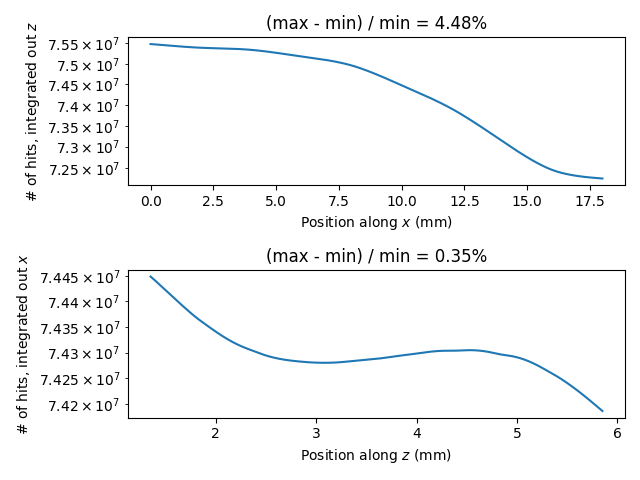

75483981.4076884 72245371.74089913
74448710.29702434 74186156.96721633


In [5]:
fig, axs = plt.subplots(nrows=2, ncols=1)

new = {'z': zz[0], 'x': xx[:,0]}
marg = {
    k: interpolated_grid.sum(axis=ax)
    for k, ax in zip('xz', (1, 0))
}

for i, (k, marg) in enumerate(marg.items()):
    cnd = marg > 0
    marg =  marg[cnd]
    axs[i].plot(new[k][cnd], marg)
    print(marg.max(), marg.min())
    d = (marg.max() - marg.min()) / marg.min()
    axs[i].set_title(f'(max - min) / min = {100 * d:.2f}%')
    axs[i].set_xlabel(f'Position along ${k}$ (mm)')
    axs[i].set_ylabel(f'# of hits, integrated out ${"z" if k == "x" else "x"}$')
    axs[i].set_yscale('log')

fig.tight_layout()

<IPython.core.display.Javascript object>


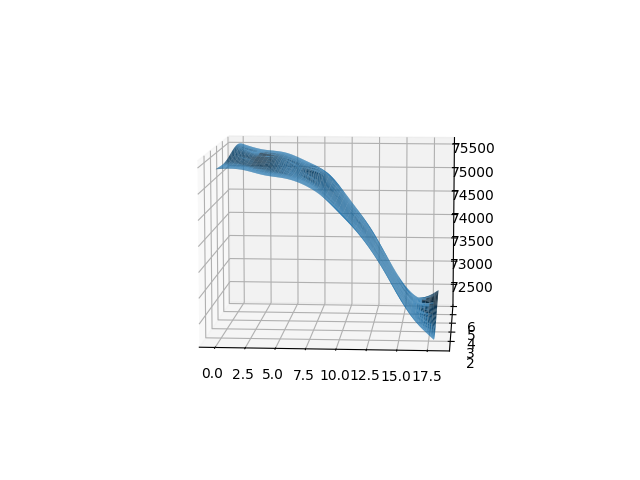

In [6]:
fig, ax = plt.subplots(subplot_kw={'projection': '3d'})
ax.plot_surface(xx, zz, interpolated_grid)